In [1]:
# for read/ write wav files
import librosa
# for numerical matrix computation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# some math functions
import math
# fft and inverse fft algorithms
from scipy.fftpack import fft, ifft
# window function for smooth dft
from scipy.signal.windows import hann, blackman, blackmanharris, triang
# audio playback in IPython Notebook
from IPython.display import Audio

In [5]:
# discrete Fourier transform (DFT) (biến đổi Fourier rời rạc)
def dft(x):
    '''manual (naive) implementation of the DFT'''
    N = len(x)
#     kv = np.arange(-N/2, N/2)
#     nv = np.arange(-N/2, N/2)
#     X = np.array([np.dot(x, np.exp(-1j * 2 * np.pi * k * nv/ N)) for k in kv])
#     return X
    kv = np.arange(N)
    nv = np.arange(N)
    
    X = []
    for k in kv:
        s = 0
        for n in nv:
            s += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
        X.append(s)
        
    return np.array(X)

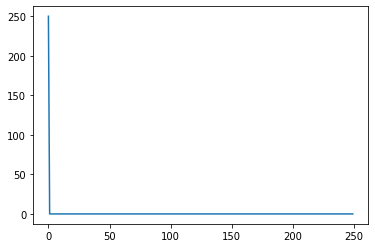

In [6]:
N = 250 
x = np.ones(N)
X = dft(x)
plt.plot(np.abs(X))
plt.show()

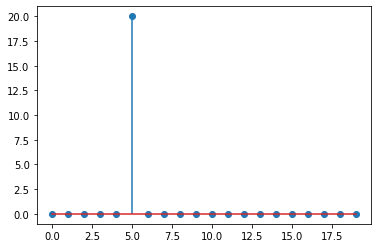

In [8]:
N = 20
k0 = 5
x = np.exp(1j * 2 * np.pi * k0 * np.arange(N) / N)
X = dft(x)
plt.stem(np.abs(X), use_line_collection = True)
plt.show()

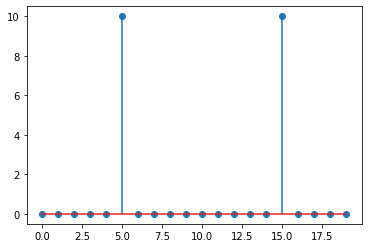

In [10]:
N = 20
k0 = 5
x = np.cos(2 * np.pi * k0 * np.arange(N) / N)
X = dft(x)
plt.stem(np.abs(X), use_line_collection = True)
plt.show()

In [16]:
fs = 20000
duration = 10
N = fs*duration
f0 = 2000
x = 10*np.cos(2 * np.pi * f0 * np.arange(N)/fs)
Audio(x, rate=fs)

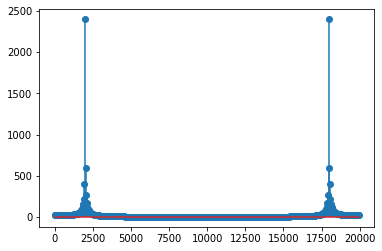

In [17]:
# f_k = f_s * k / N
n_fft = 512
X = dft(x[:n_fft])
plt.stem(np.arange(n_fft)/n_fft*fs, np.abs(X), use_line_collection=True)
plt.show()

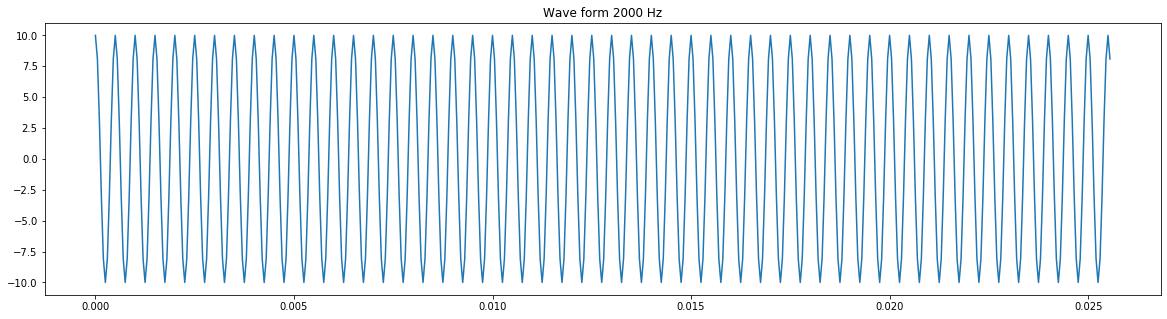

In [20]:
plt.figure(figsize=(20,5))
plt.title(f'Wave form {f0} Hz')
plt.plot(np.arange(n_fft)/fs, x[:n_fft])

# Tổng hợp 2 tín hiêu

In [21]:
# cua 2 tin hiệu 2000 hz và 1500 hz
fs = 20000
duration = 10
N = fs*duration
f0 = 2000
f1 = 1500
x = 10*np.cos(2 * np.pi * f0 * np.arange(N)/fs) + 5*np.cos(2 * np.pi * f1 * np.arange(N)/fs)
Audio(x, rate=fs)

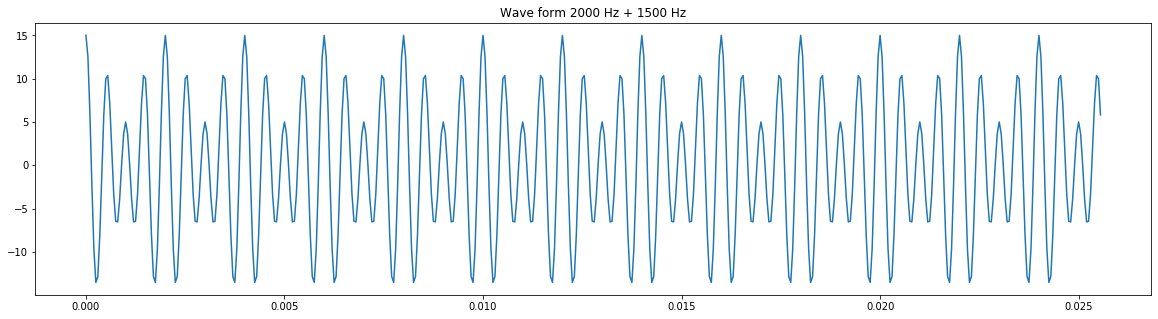

In [22]:
plt.figure(figsize=(20,5))
plt.title(f'Wave form {f0} Hz + {f1} Hz')
plt.plot(np.arange(n_fft)/fs, x[:n_fft])

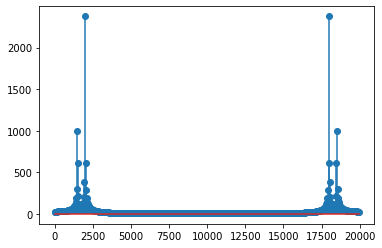

In [23]:
# DFT của tín hiệu thực có phần thực là hàm chẵn
n_fft = 512
X = dft(x[:n_fft])
plt.stem(np.arange(n_fft)/n_fft*fs, np.abs(X), use_line_collection=True)
plt.show()

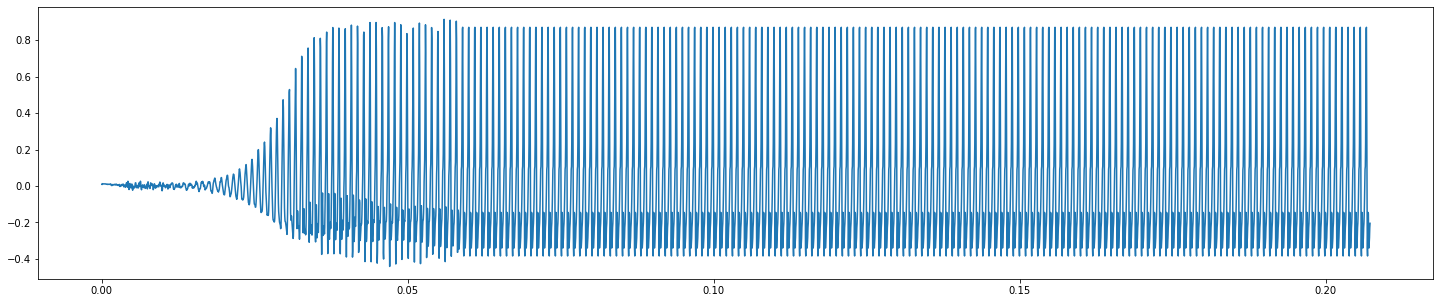

In [25]:
y, sr = librosa.load('soprano-E4.wav')
N = len(y)
plt.figure(figsize = (25,5))
plt.plot(np.arange(N//5)/sr, y[:N//5])
plt.show()

In [26]:
Audio(y, rate=sr)

N 551


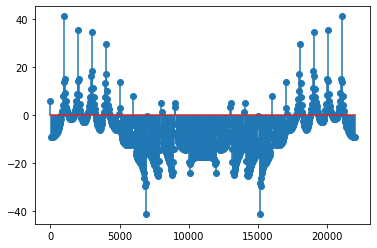

In [36]:
# cac tan so sau cai cao nhat la tan so cong huong
# Tot cho phan tich nhac de doan nhac cu
t1, t2 = 0.1, 0.125
i1, i2 = int(t1*sr), int(t2*sr)
x = y[i1:i2]
N = len(x)
print("N", N)
X = dft(x)
plt.stem(np.arange(N)/N*sr, 20*np.log10(np.abs(X)), use_line_collection=True)
plt.show()

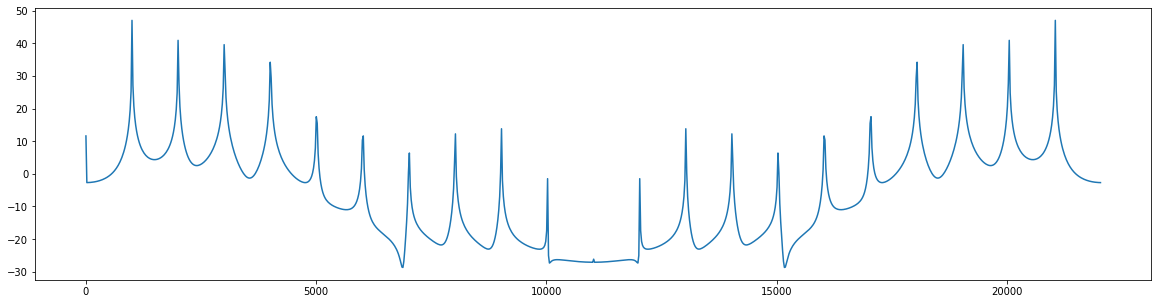

In [31]:
plt.figure(figsize = (20, 5))
plt.plot(np.arange(N)/N * sr,20 * np.log10(np.abs(X)))
plt.show()

In [32]:
def centered_padded_fft(x1, N, window):
    M = len(x1)
    hN = N//2
    
    x1 = x1 * window / np.sum(window)
    
    fftbuffer = np.zeros(N)
    hM1 = int(math.floor((M+1)/2))
    hM2 = int(math.floor(M/2))
    fftbuffer[:hM1] = x1[hM2:]
    fftbuffer[N-hM2:] = x1[:hM2]

    X = fft(fftbuffer)
    mX = 20*np.log10(np.abs(X[:hN]))
    pX = np.unwrap(np.angle(X[:hN]))
    return mX, pX

def centered_padded_ifft(mX, pX, M):
    N = len(mX)*2
    
    Y = np.zeros(N, dtype=np.complex)
    hN = N//2
    Y[:hN] = 10**(mX/20) * np.exp(1j*pX)
    Y[hN+1:] = 10**(mX[:0:-1]/20) * np.exp(-1j*pX[:0:-1])
    fftbuffer = np.real(ifft(Y))
    
    y = np.zeros(M)
    hM1 = int(math.floor((M+1)/2))
    hM2 = int(math.floor(M/2))
    y[hM2:] = fftbuffer[:hM1]
    y[:hM2] = fftbuffer[N-hM2:]

    return y

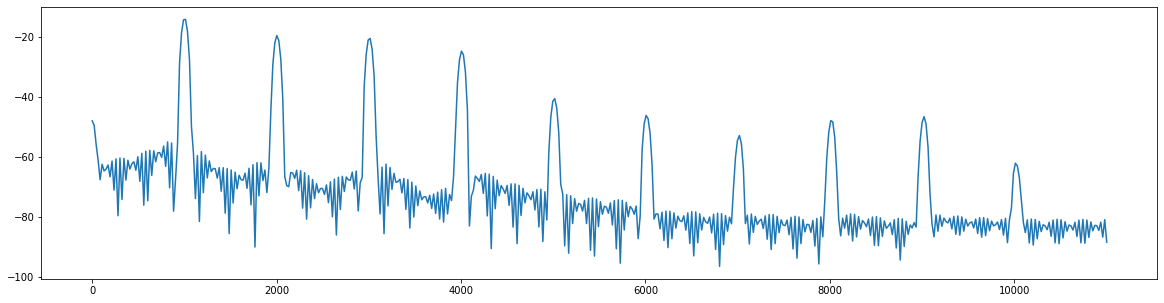

In [37]:
M = len(x)
N = 1024
window = np.hamming(M)
mX, pX = centered_padded_fft(x, N, window=window)

plt.figure(figsize=(20,5))
plt.plot(np.arange(N//2)/N*sr, mX)
plt.show()

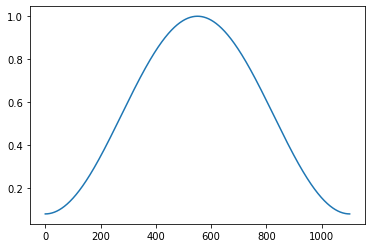

In [35]:
plt.plot(window)